# Análisis EDA del dataset analisis de fraude bancario 

## Importamos las librerias

In [46]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
import pickle
import seaborn as sns 

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.feature_selection import mutual_info_classif

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.base import BaseEstimator, ClassifierMixin

# Análisis primario del dataset

In [32]:
pd.set_option('display.max_columns',33)

In [33]:
df_raw=pd.read_csv('../data/creditcard.csv')

In [34]:
train, test = train_test_split(df_raw, test_size=0.2, stratify=df_raw["Class"],random_state=42)
eda_df=train.copy()

In [35]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227845 entries, 265518 to 17677
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  float64
 1   V1      227845 non-null  float64
 2   V2      227845 non-null  float64
 3   V3      227845 non-null  float64
 4   V4      227845 non-null  float64
 5   V5      227845 non-null  float64
 6   V6      227845 non-null  float64
 7   V7      227845 non-null  float64
 8   V8      227845 non-null  float64
 9   V9      227845 non-null  float64
 10  V10     227845 non-null  float64
 11  V11     227845 non-null  float64
 12  V12     227845 non-null  float64
 13  V13     227845 non-null  float64
 14  V14     227845 non-null  float64
 15  V15     227845 non-null  float64
 16  V16     227845 non-null  float64
 17  V17     227845 non-null  float64
 18  V18     227845 non-null  float64
 19  V19     227845 non-null  float64
 20  V20     227845 non-null  float64
 21  V21     227

In [36]:
eda_df.head(11)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0
130664,79404.0,1.320449,-1.560991,-0.154324,-1.806184,-0.831334,0.877820,-1.212515,0.246020,-1.747897,1.518364,-0.219600,-1.160047,-0.241156,-0.036872,0.554341,0.280024,-0.114839,0.669845,0.313595,-0.123905,-0.346511,-0.941239,-0.104322,-1.790279,0.184198,-0.299018,0.025862,0.016056,125.29,0
158877,111904.0,1.902180,0.158704,-0.210092,3.459251,0.346012,1.465813,-0.749323,0.432622,-0.390130,1.554882,-0.593728,-0.093230,-0.288613,-0.057362,-1.126953,1.683360,-1.483120,0.966427,-1.134977,-0.250456,0.208545,0.646480,0.075336,-0.176780,-0.095253,0.090097,0.004346,-0.045702,1.51,0
242784,151647.0,2.091991,-1.009477,-0.885660,-0.424255,-0.575602,0.486532,-1.033124,0.201550,0.263308,0.794406,-0.251315,0.321914,-0.475190,-0.029051,-0.807339,-1.492080,-0.356937,2.038465,-0.347143,-0.639071,-0.158022,0.244872,0.083967,0.116089,0.032727,-0.123307,0.042437,-0.051537,11.99,0
270403,164062.0,-3.309691,-5.662946,0.466119,-0.430087,3.664003,-3.036146,-2.841650,0.520501,1.485832,-0.499631,0.101414,1.158784,0.363202,0.032692,-0.164763,0.615232,-1.097096,1.078787,0.267905,1.535663,0.819604,0.742448,1.745293,-0.490856,-2.153907,0.173475,0.119893,0.467544,208.60,0
235709,148508.0,1.973973,-0.404605,-0.222072,0.534479,-0.830112,-0.626462,-0.595997,-0.066845,1.465829,-0.166011,-0.975933,0.499746,0.133125,-0.201325,0.470892,0.068961,-0.494964,0.190176,-0.237587,-0.220785,0.194876,0.822169,0.120061,0.072218,-0.097635,-0.215837,0.041900,-0.036105,9.99,0


In [48]:
#Cambiamos nuestra variable objetivo de tipo numerica a categórica
eda_df['Class']=eda_df['Class'].astype('object')

In [53]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227845 entries, 265518 to 17677
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  float64
 1   V1      227845 non-null  float64
 2   V2      227845 non-null  float64
 3   V3      227845 non-null  float64
 4   V4      227845 non-null  float64
 5   V5      227845 non-null  float64
 6   V6      227845 non-null  float64
 7   V7      227845 non-null  float64
 8   V8      227845 non-null  float64
 9   V9      227845 non-null  float64
 10  V10     227845 non-null  float64
 11  V11     227845 non-null  float64
 12  V12     227845 non-null  float64
 13  V13     227845 non-null  float64
 14  V14     227845 non-null  float64
 15  V15     227845 non-null  float64
 16  V16     227845 non-null  float64
 17  V17     227845 non-null  float64
 18  V18     227845 non-null  float64
 19  V19     227845 non-null  float64
 20  V20     227845 non-null  float64
 21  V21     227

In [38]:
eda_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,227845.0,94885.093704,47488.415034,0.000000,54228.000000,84805.000000,139364.000000,172792.000000
V1,227845.0,0.000795,1.958926,-56.407510,-0.919893,0.018692,1.315616,2.451888
V2,227845.0,-0.000481,1.649092,-72.715728,-0.598761,0.064746,0.803876,22.057729
V3,227845.0,-0.000383,1.515292,-48.325589,-0.891767,0.179859,1.026457,9.382558
V4,227845.0,-0.000020,1.415867,-5.683171,-0.847111,-0.021361,0.742281,16.875344
V5,227845.0,0.000175,1.379569,-113.743307,-0.692100,-0.054757,0.611259,34.801666
V6,227845.0,-0.001171,1.331218,-26.160506,-0.768603,-0.274156,0.397501,73.301626
V7,227845.0,0.000077,1.238431,-43.557242,-0.553481,0.040420,0.570530,120.589494
V8,227845.0,-0.000434,1.191482,-73.216718,-0.207839,0.023219,0.327824,20.007208
V9,227845.0,0.000702,1.097351,-13.434066,-0.640307,-0.050653,0.598254,15.594995


In [39]:
num_cols=eda_df.select_dtypes(exclude='object').columns

In [40]:
def print_variables(df, cols):
    for col in cols:
        plt.figure(figsize=(12, 6))
        
        # Subgráfico para el boxplot
        plt.subplot(1, 2, 1) 
        sns.boxplot(y=df[col], showmeans=True)
        plt.title(f'Boxplot de {col}')
        plt.ylabel('Valores')
        plt.grid(True)

        # Subgráfico para la distribución
        plt.subplot(1, 2, 2)  
        sns.histplot(df[col], kde=True, bins=30)  
        plt.title(f'Distribución de {col}')
        plt.xlabel('Valores')
        plt.ylabel('Frecuencia')
        plt.grid(True)

        plt.tight_layout()  
        plt.show()

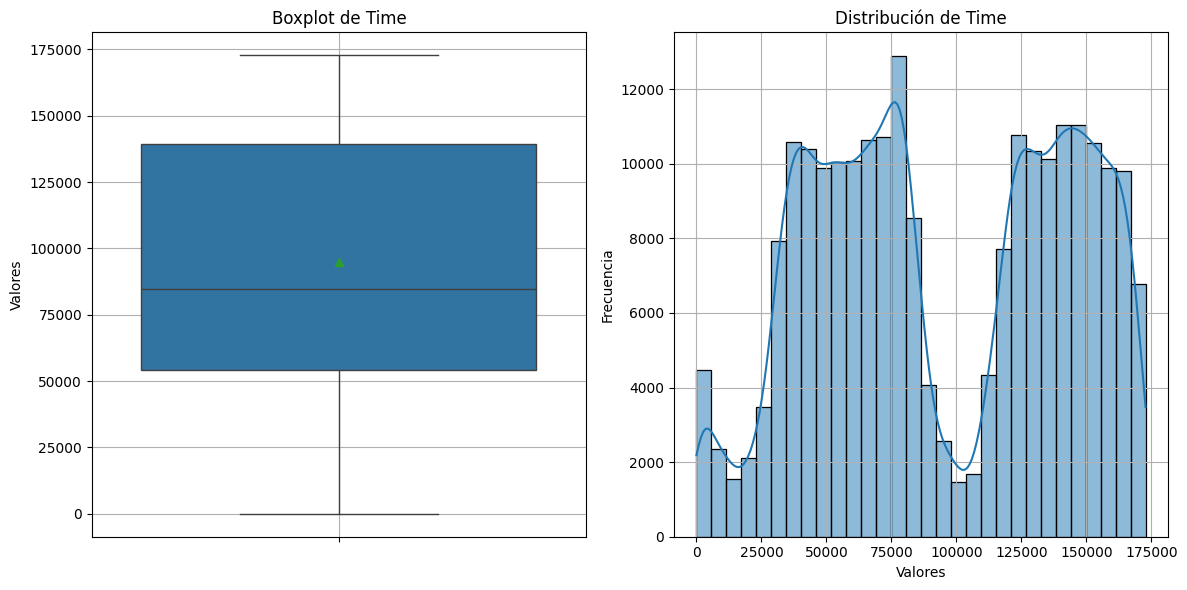

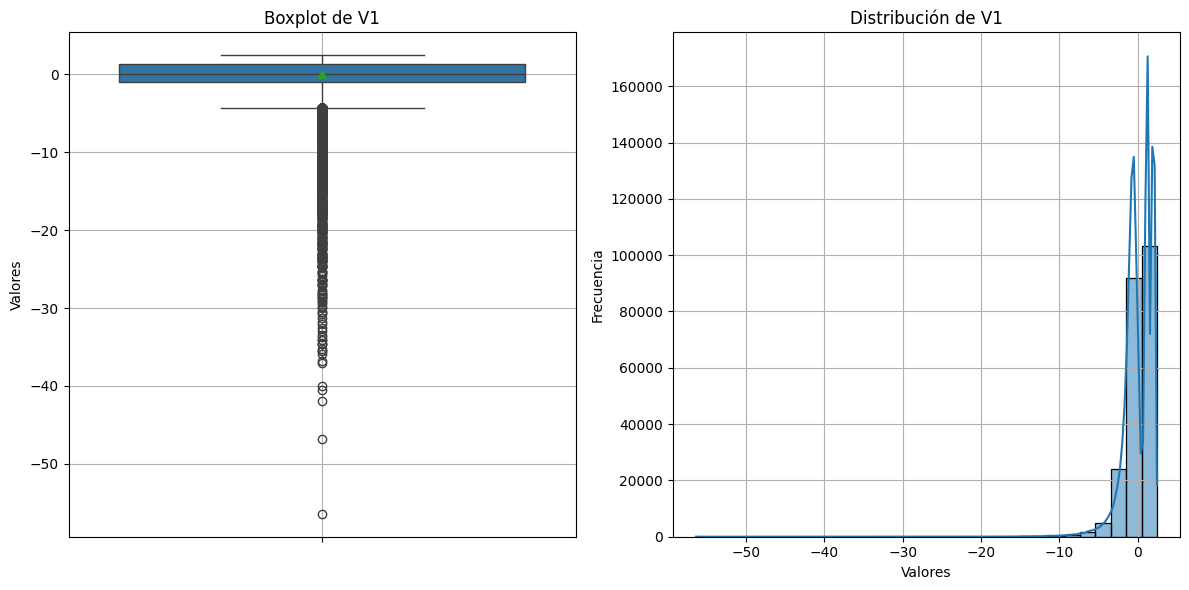

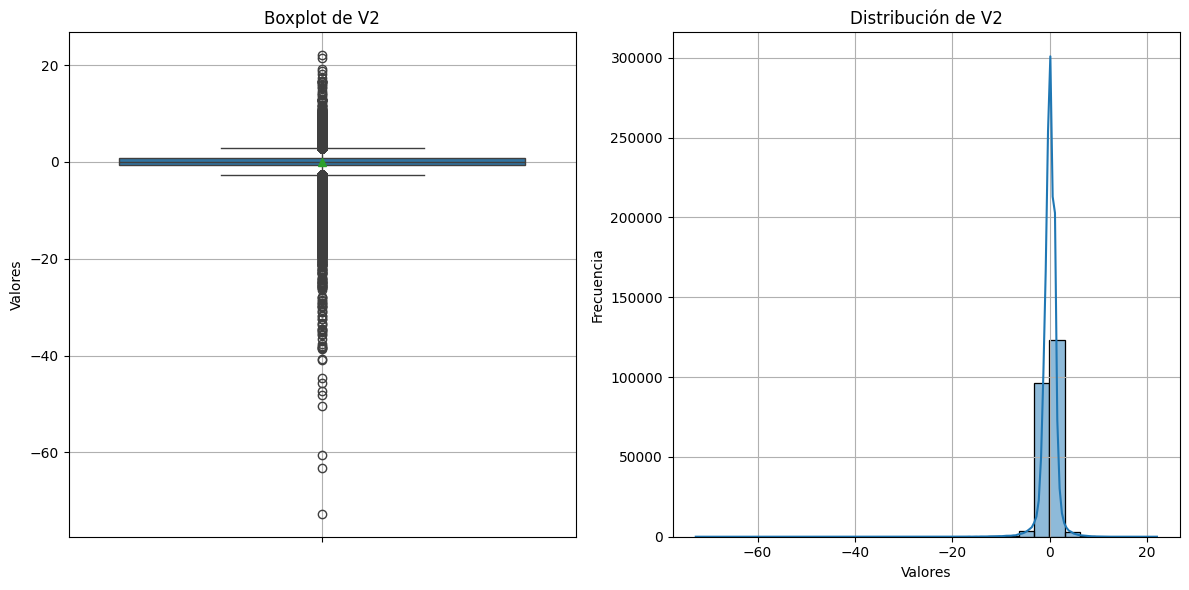

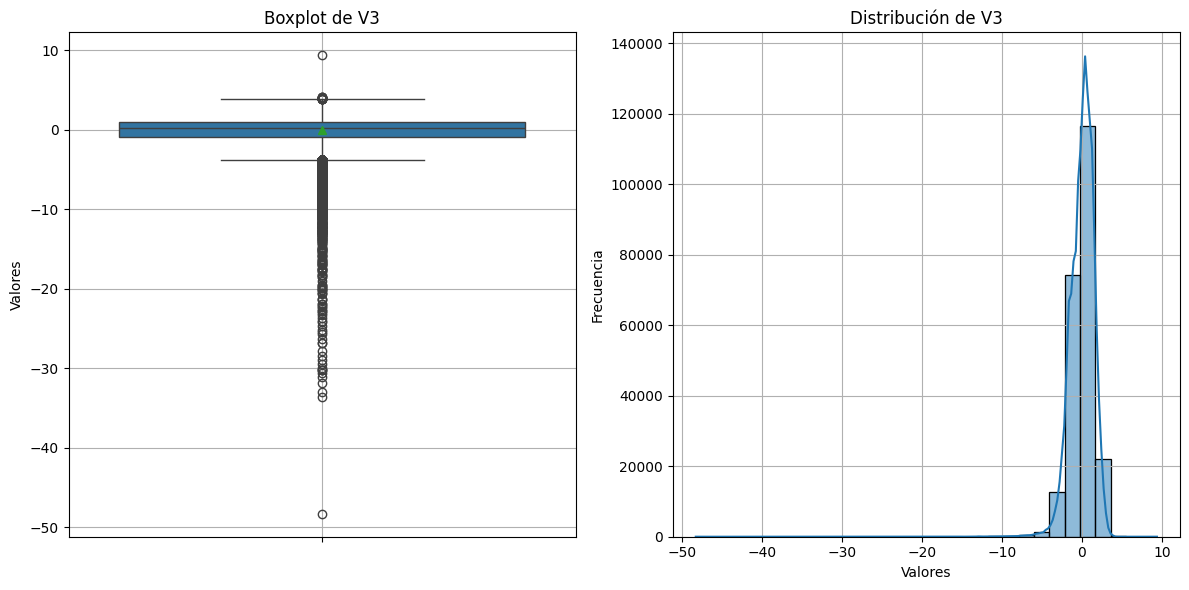

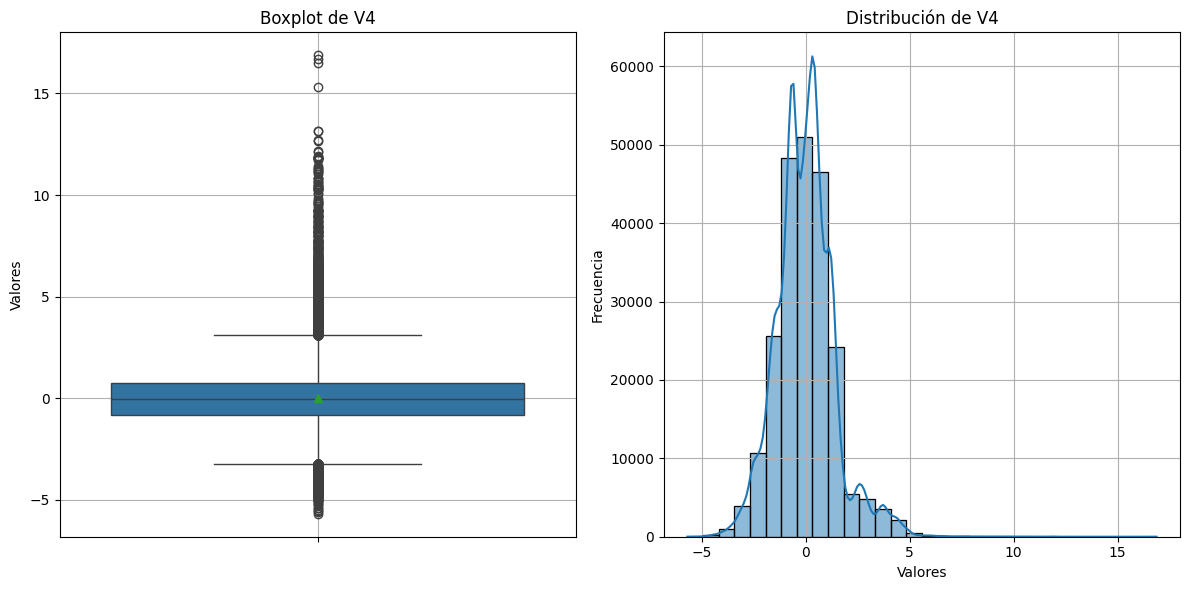

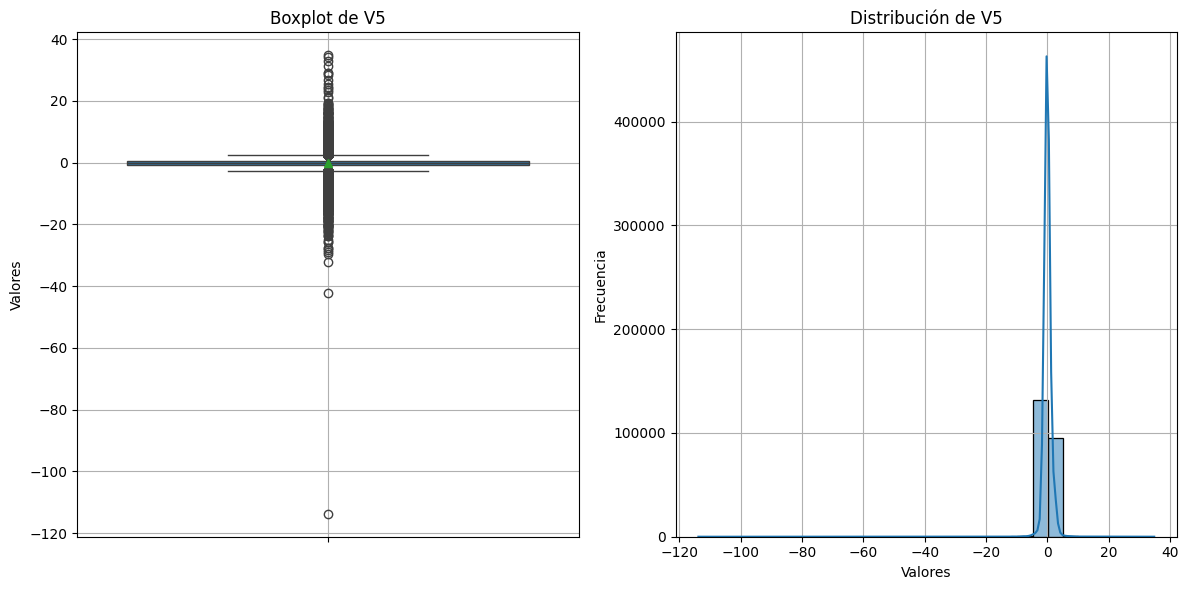

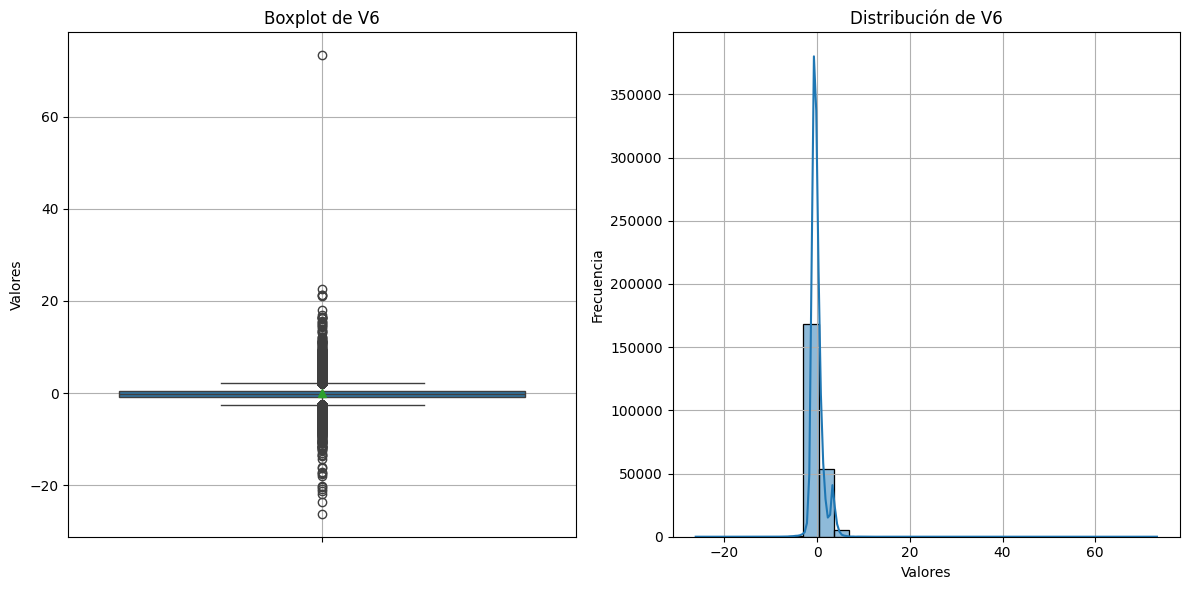

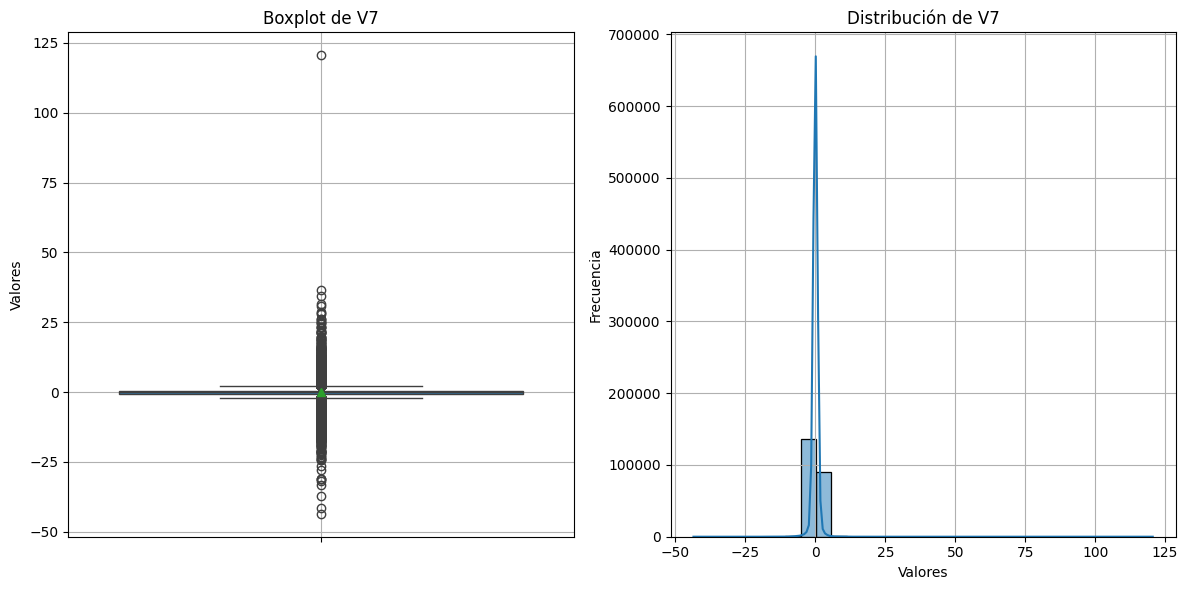

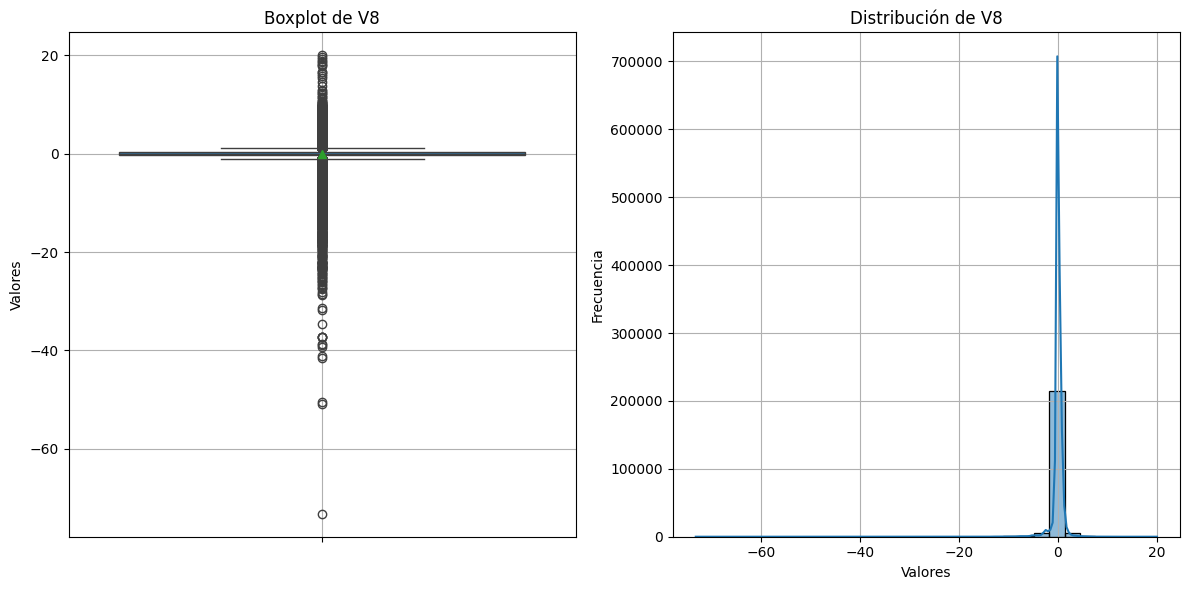

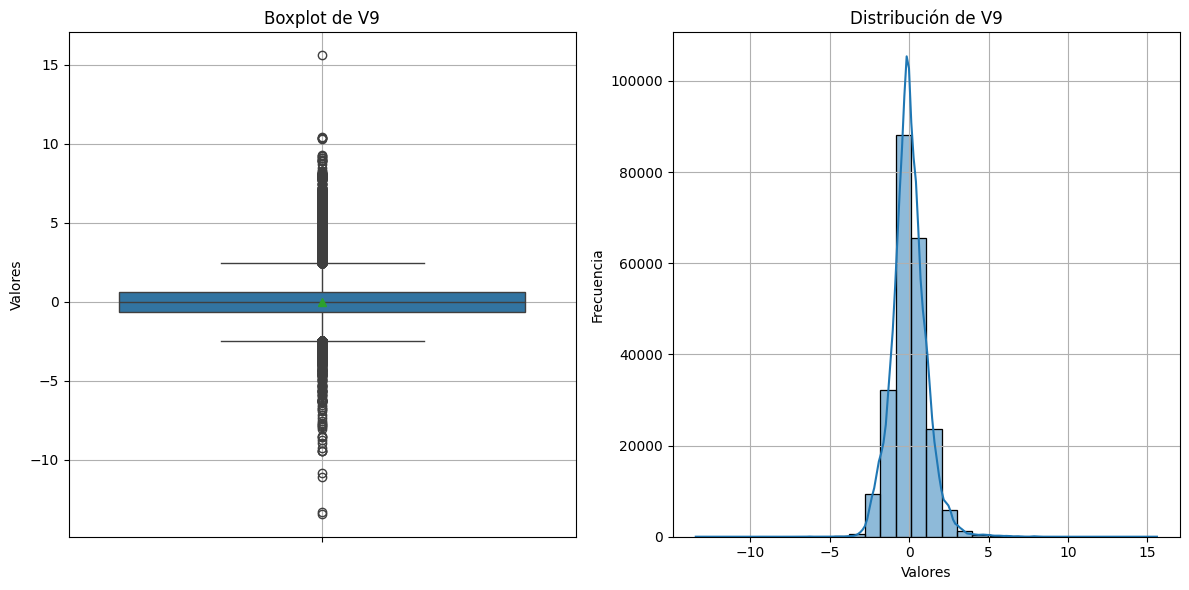

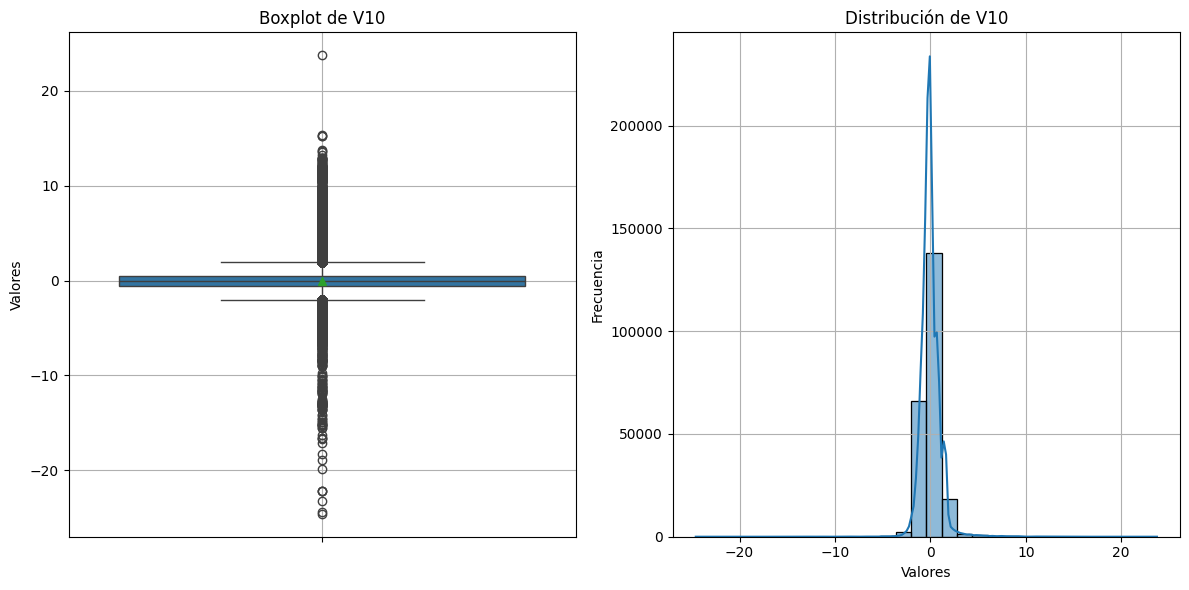

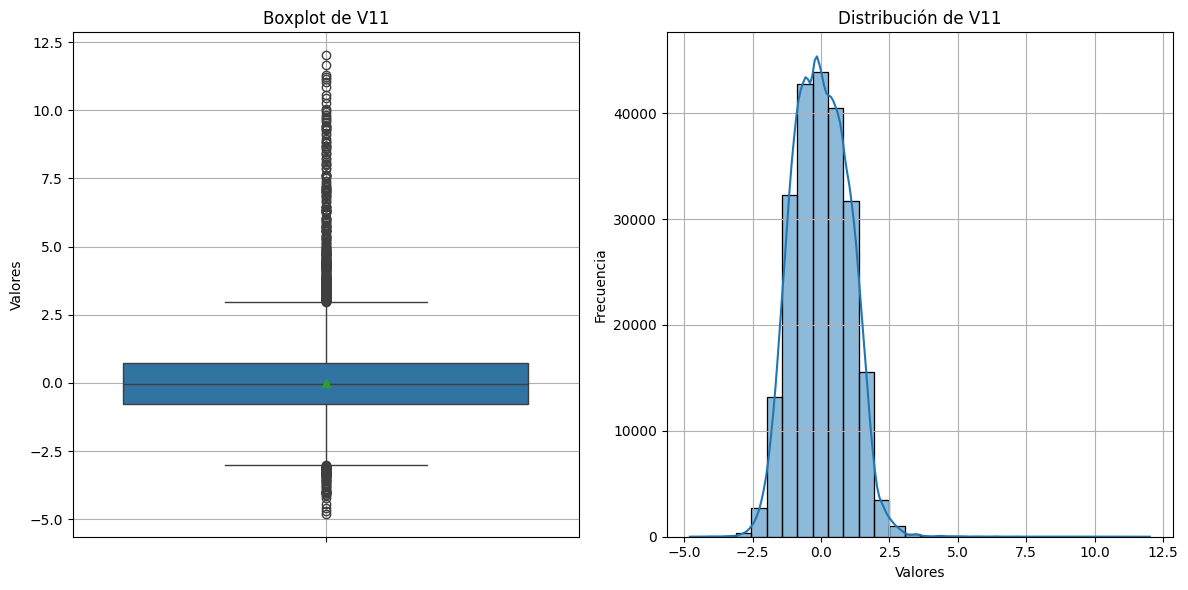

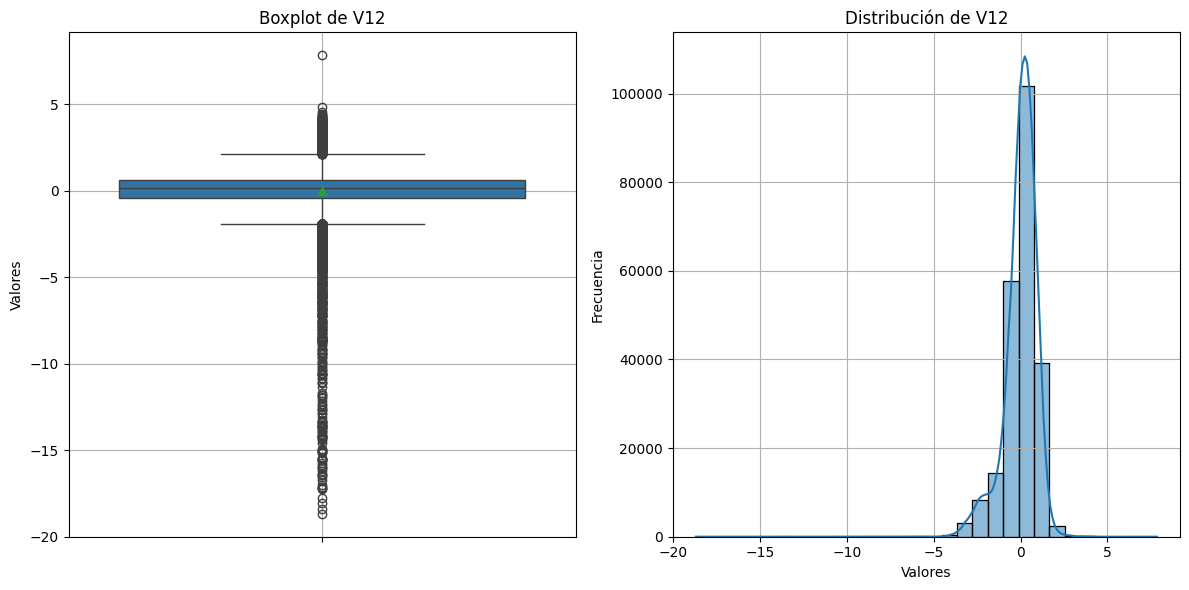

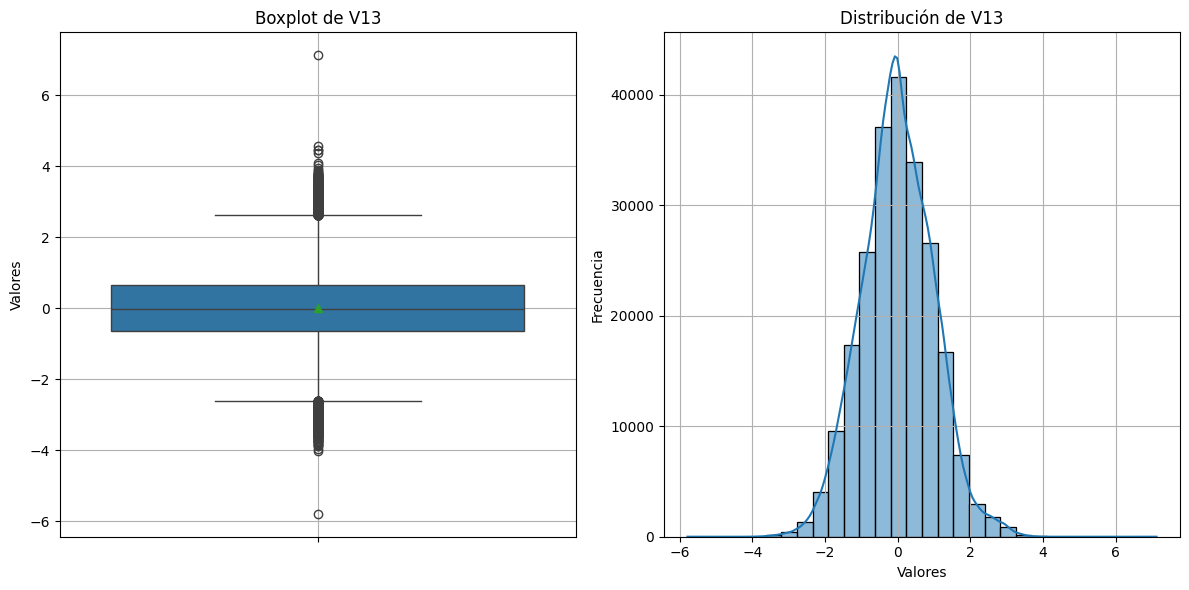

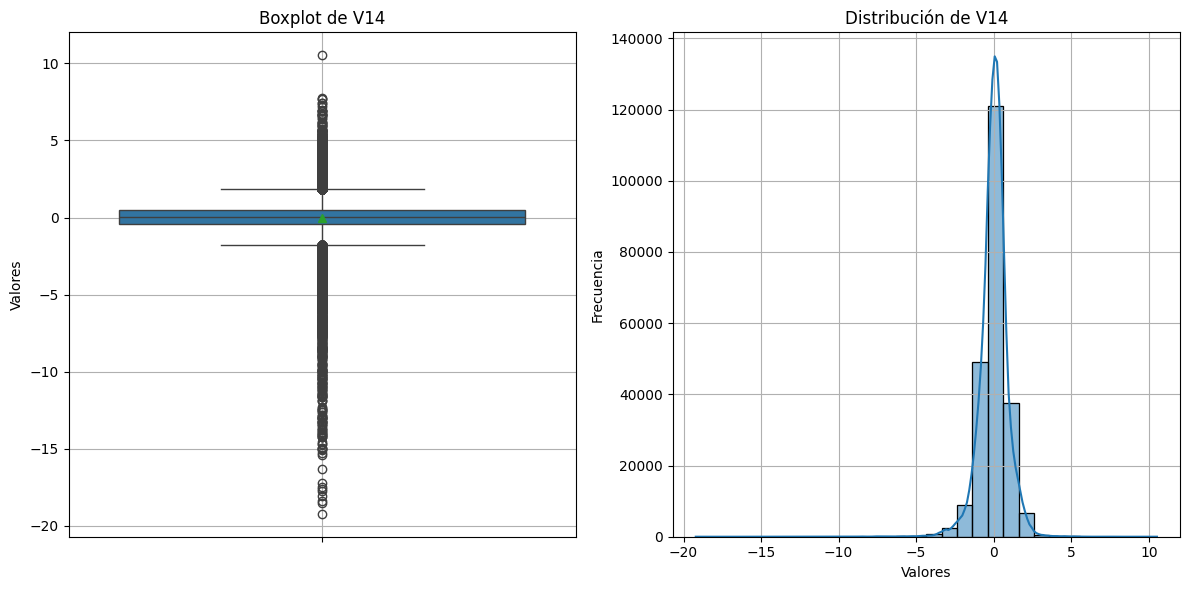

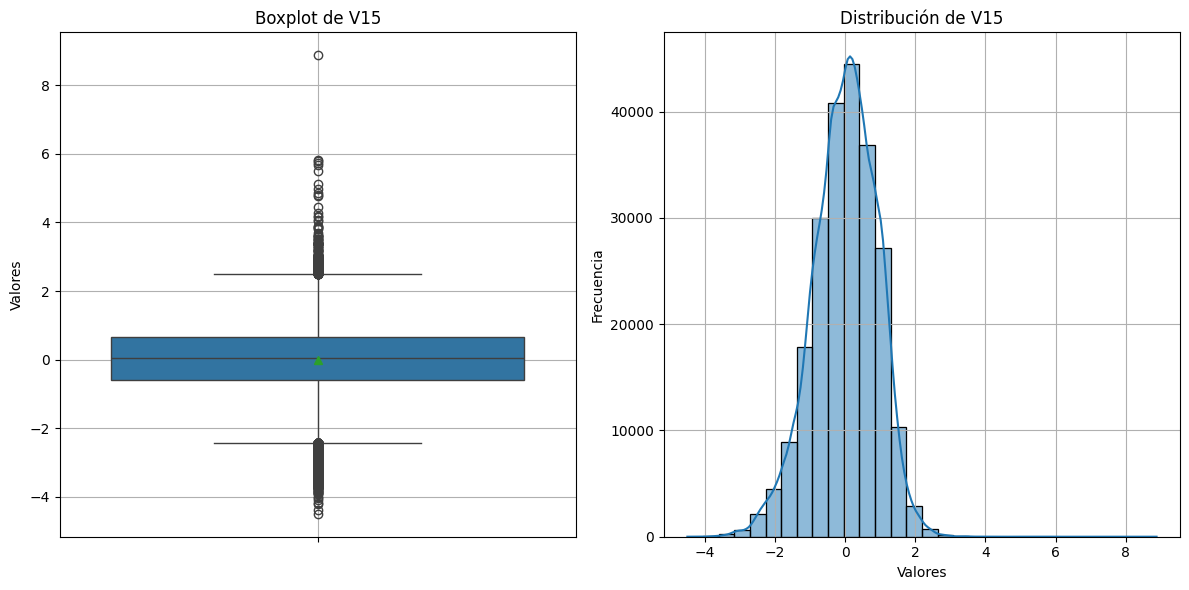

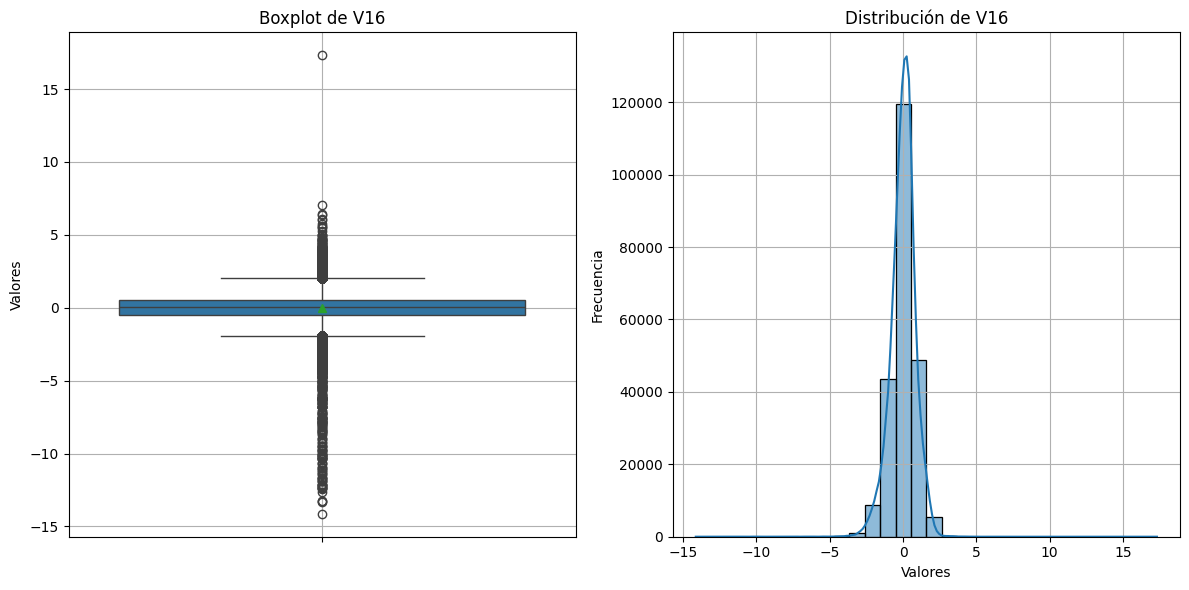

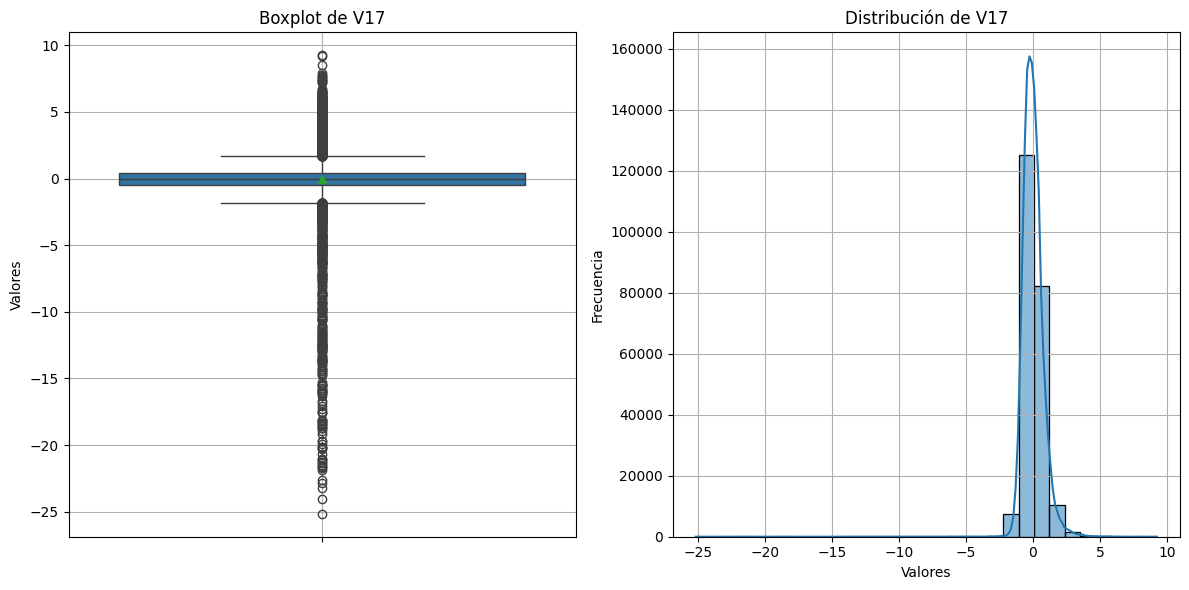

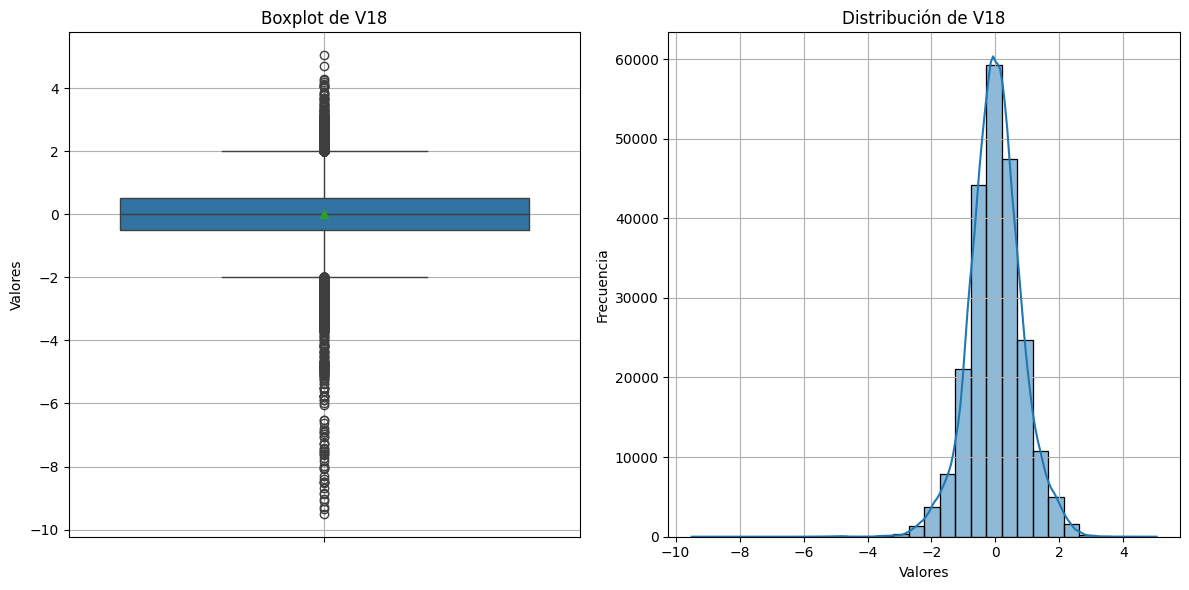

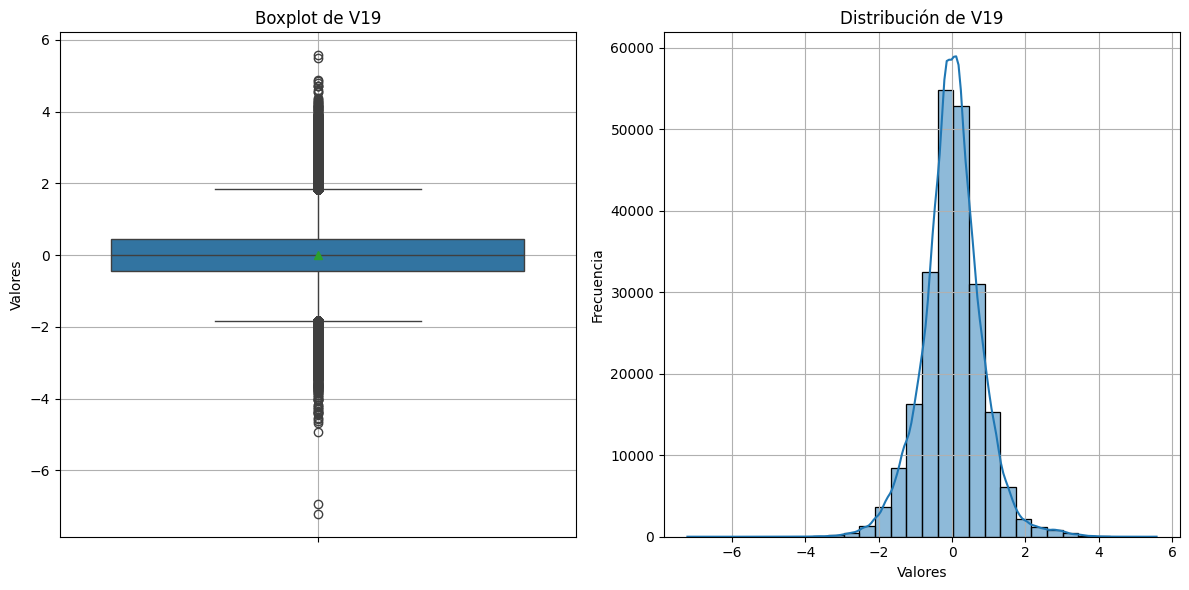

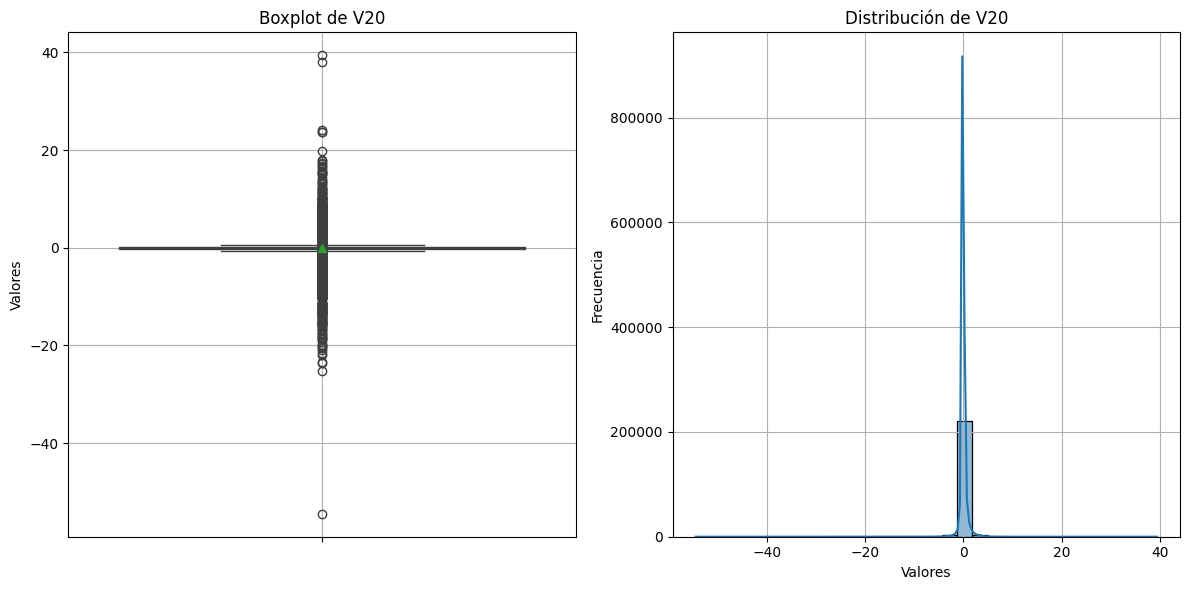

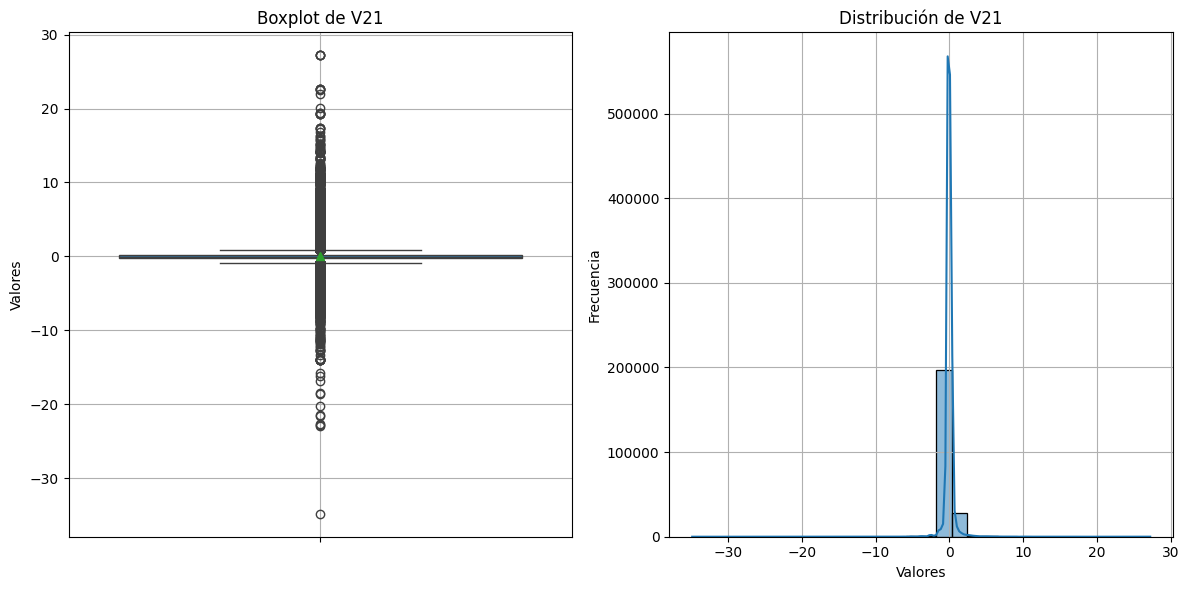

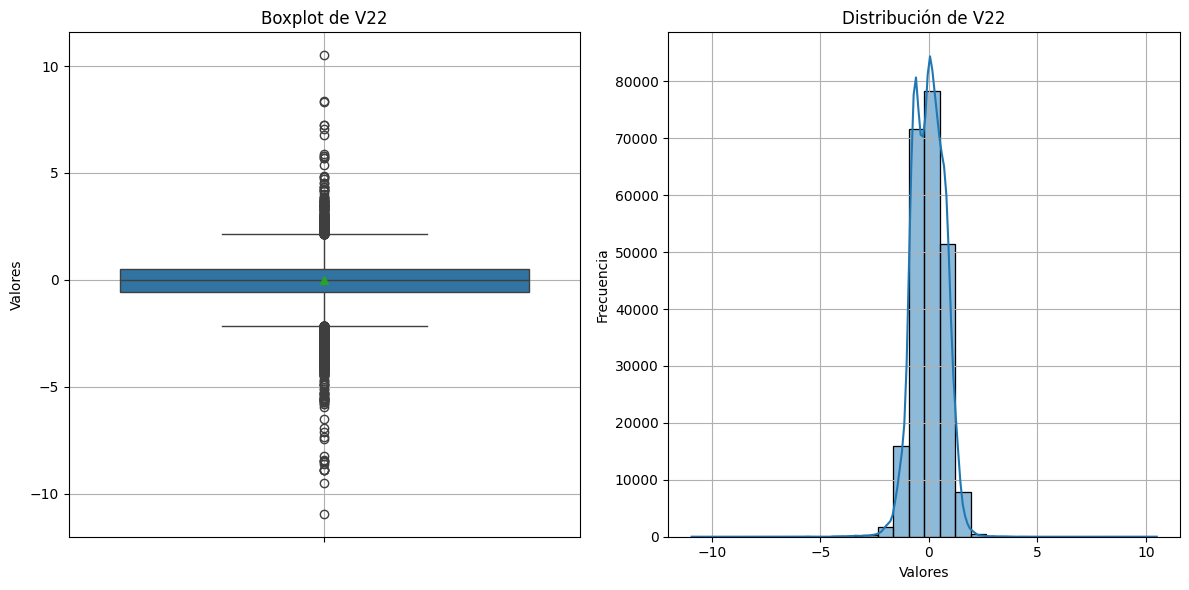

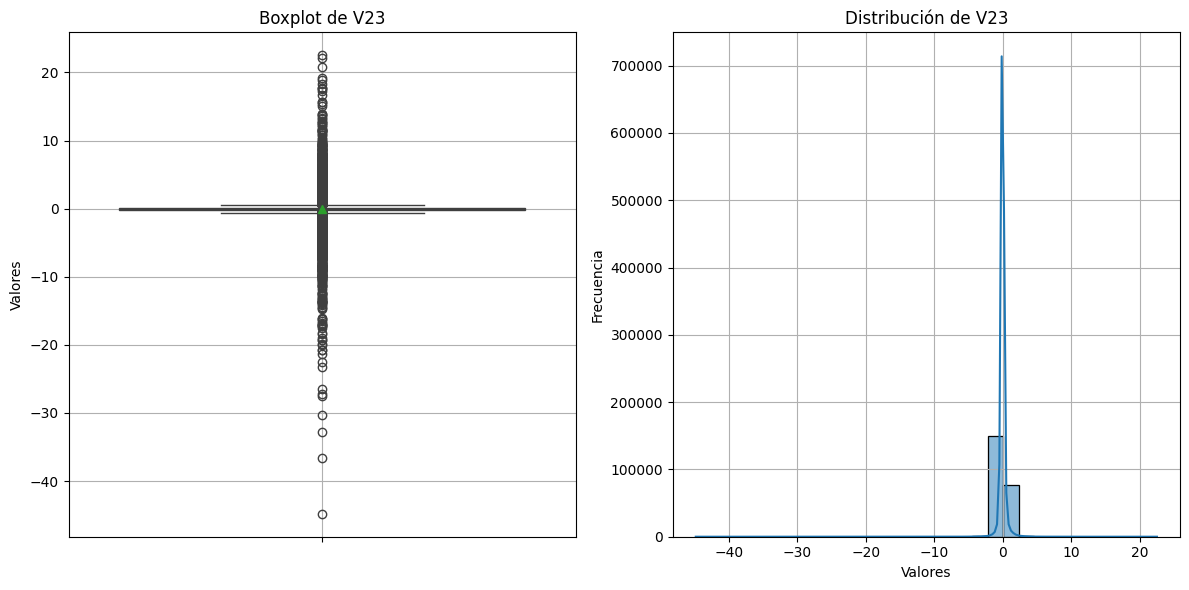

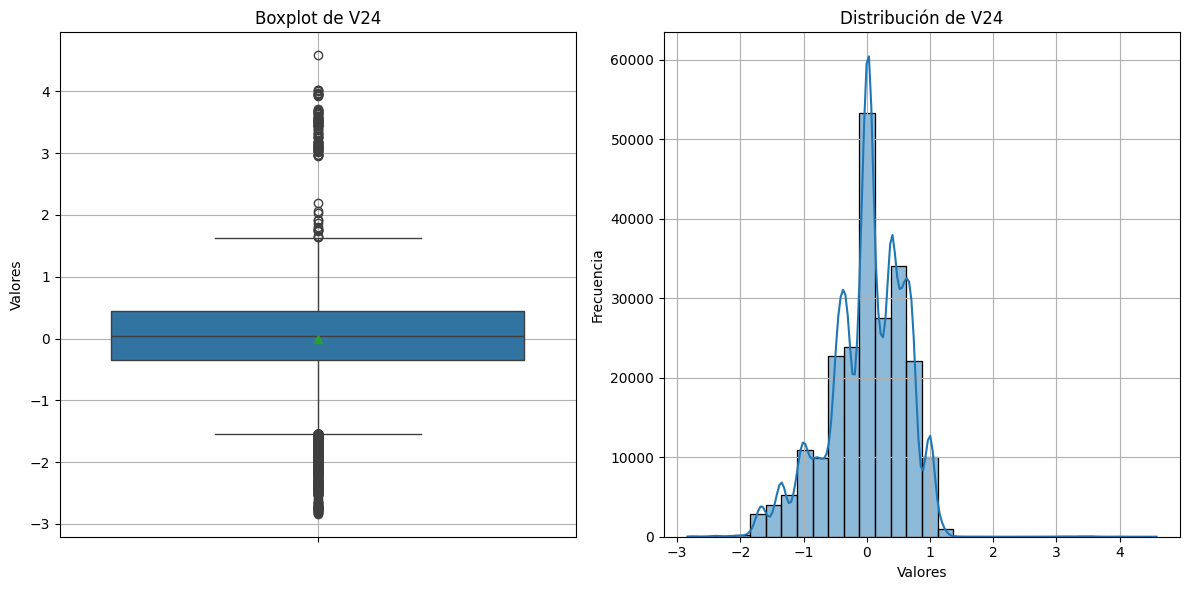

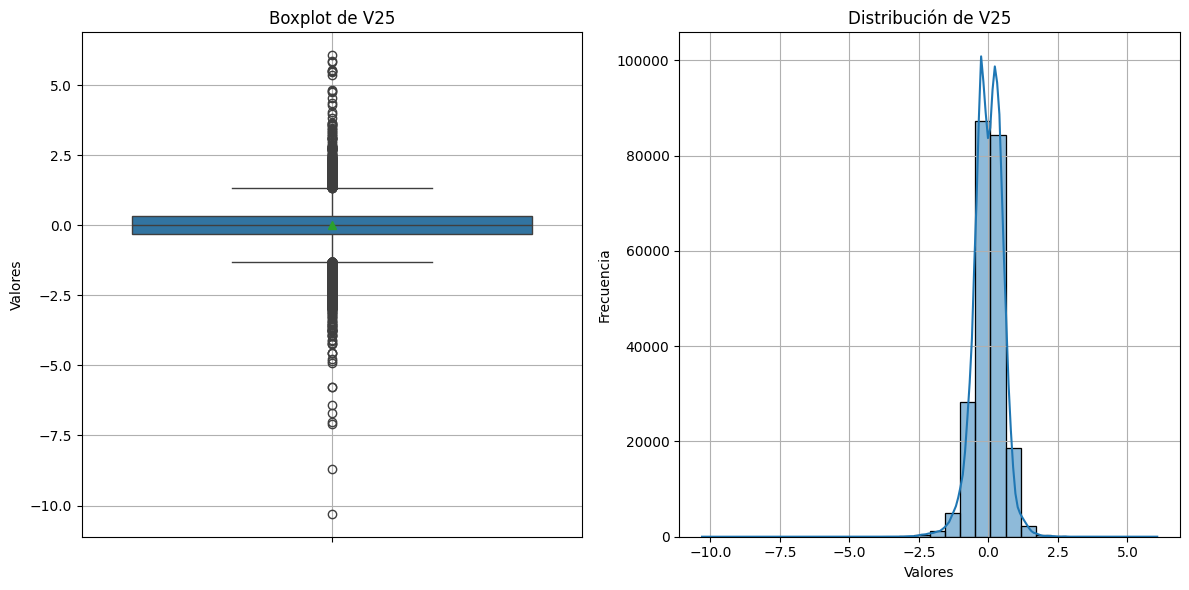

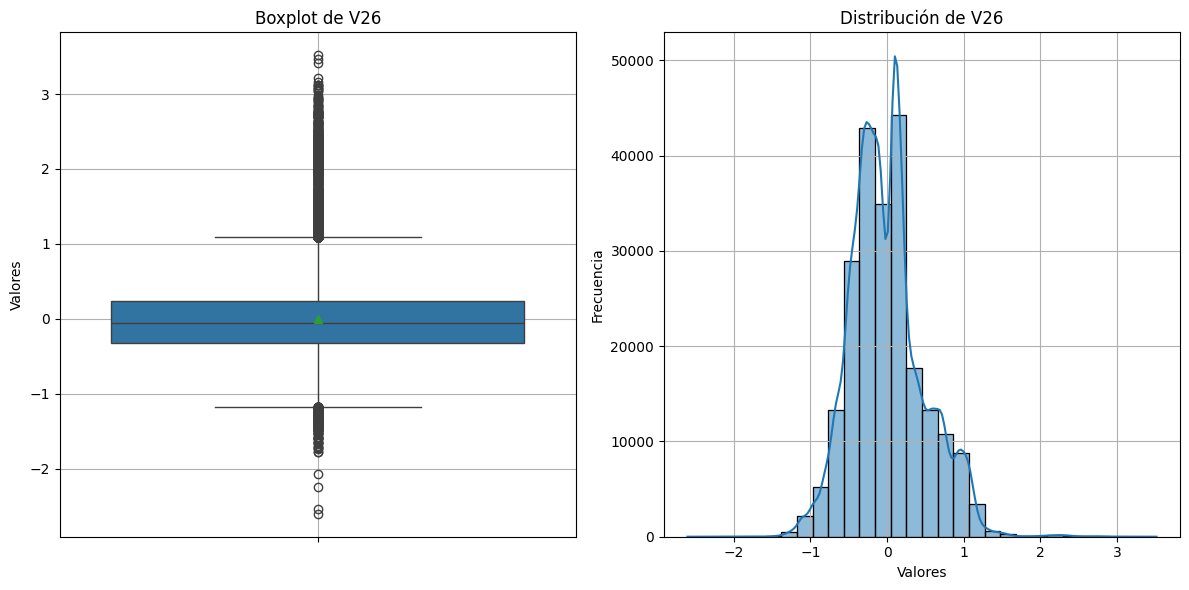

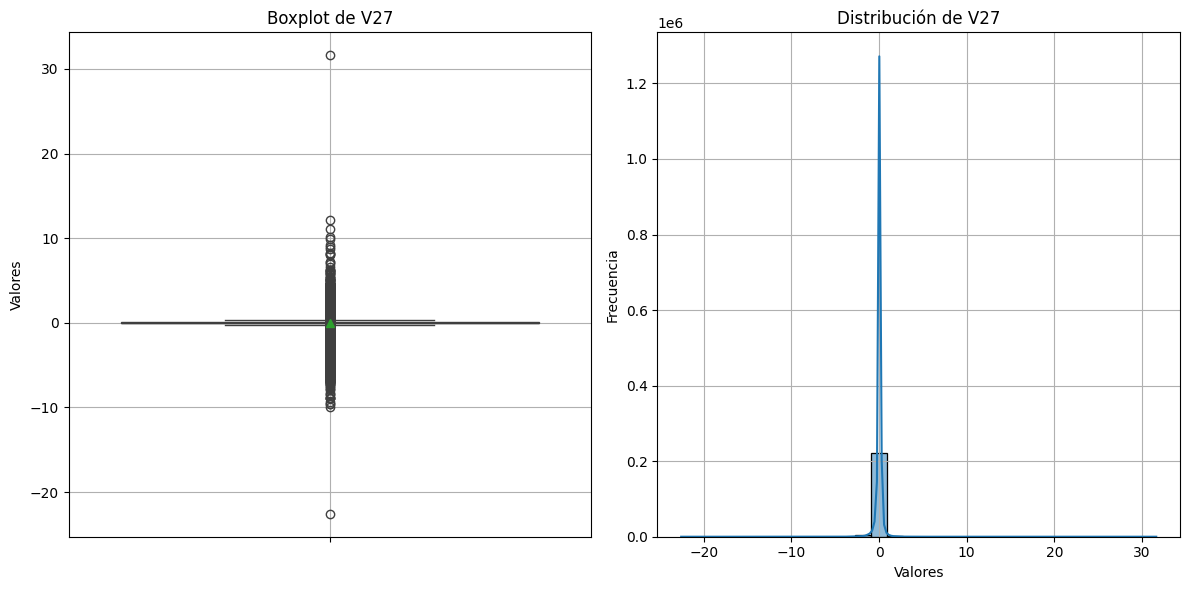

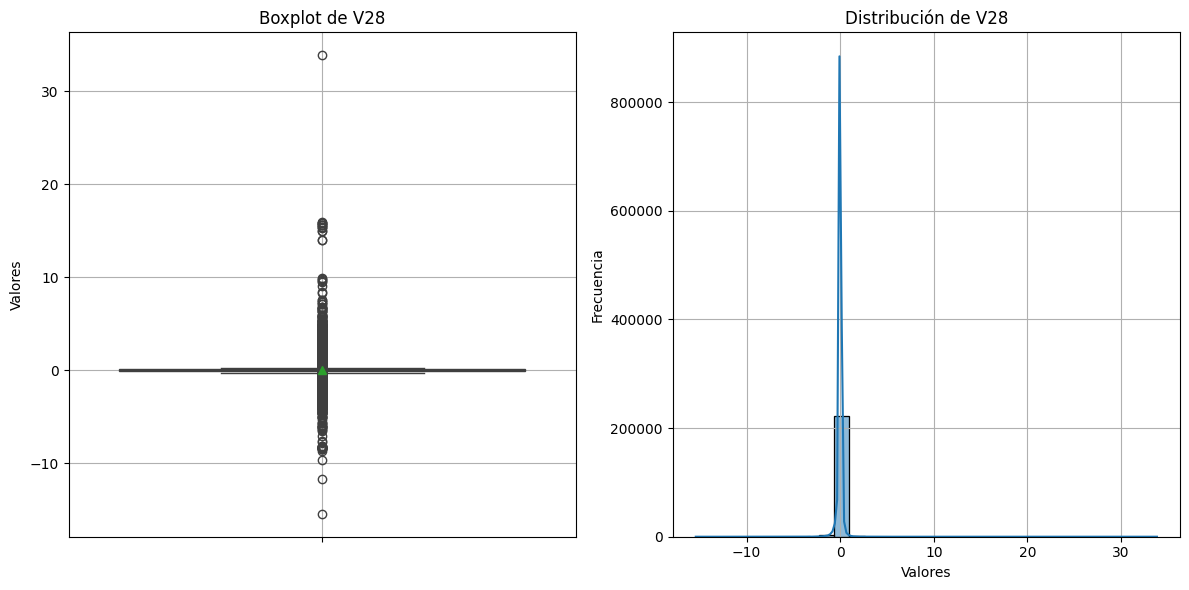

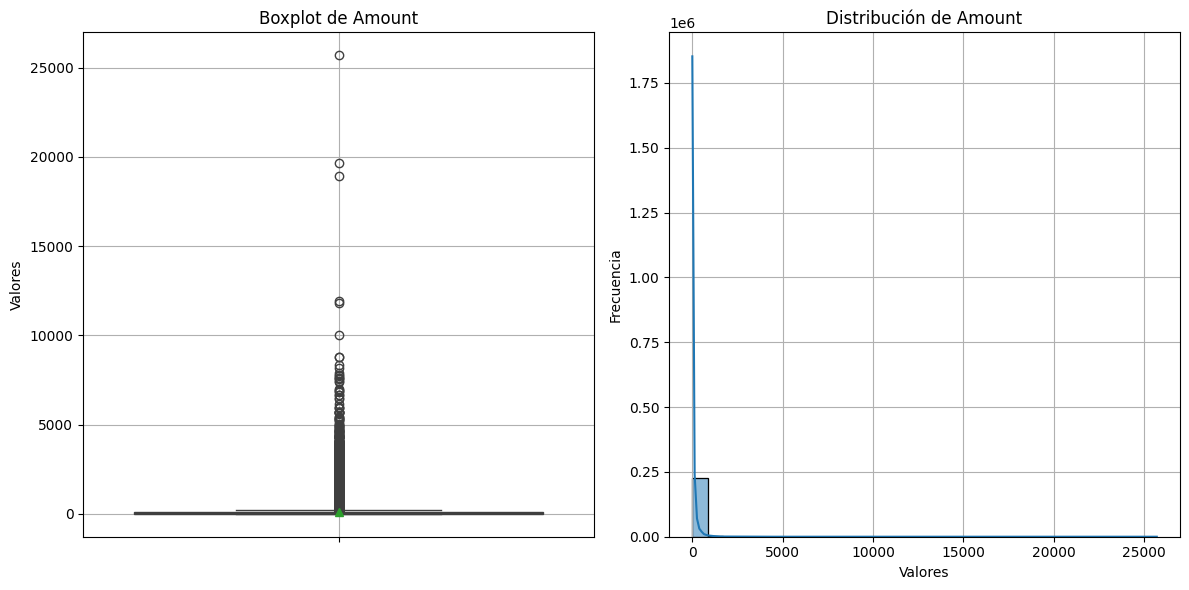

In [41]:
print_variables(eda_df,num_cols)

In [42]:
def percentage_above_below_2std(df):
    """
    Calcula el porcentaje de valores por encima y por debajo de media ± 2*std para cada columna numérica.
    
    Parámetros:
    df (pd.DataFrame): DataFrame con los datos.
    
    Retorna:
    pd.DataFrame: DataFrame con las columnas y los porcentajes calculados.
    """
    results = []
    
    for col in df.select_dtypes(include=[np.number]).columns:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - 2 * std
        upper_bound = mean + 2 * std
        
        below = (df[col] < lower_bound).mean() * 100
        above = (df[col] > upper_bound).mean() * 100
        
        results.append({
            'columna': col,
            '%_below_2std': below,
            '%_above_2std': above,
            'total%': below+above
        })
    
    return pd.DataFrame(results)


In [43]:
percentage_above_below_2std(eda_df)

,columna,%_below_2std,%_above_2std,total%
0,Time,0.000000,0.000000,0.000000
1,V1,2.923479,0.000000,2.923479
2,V2,2.123373,1.363646,3.487020
3,V3,2.384955,0.366477,2.751432
4,V4,1.698962,3.938642,5.637605
5,V5,1.235928,2.265575,3.501503
6,V6,0.537207,6.424982,6.962189
7,V7,1.396563,1.201255,2.597819
8,V8,2.145757,0.741293,2.887050
9,V9,2.072023,2.942351,5.014374


En el código llevado a cabo arriba, hemos fijado un rango por debajo calculado como media - 2*std, y un rango por encima calculado como media + 2*std, esto se hace así por regla general. 
A continuacion el porcentaje de valores atípicos tanto por debajo como por encima, lo guardamos para la parte del preprocessing. 

In [44]:
"""
for col in num_cols:
        media = eda_df[col].mean()
        std = eda_df[col].std()
        mediana = eda_df[col].median()

        limite_inferior = media - 2 * std
        limite_superior = media + 2 * std

        # Reemplaza los valores fuera del rango por la mediana
        eda_df[col] = eda_df[col].apply(lambda x: mediana if x < limite_inferior or x > limite_superior else x)
"""


'\nfor col in num_cols:\n        media = eda_df[col].mean()\n        std = eda_df[col].std()\n        mediana = eda_df[col].median()\n\n        limite_inferior = media - 2 * std\n        limite_superior = media + 2 * std\n\n        # Reemplaza los valores fuera del rango por la mediana\n        eda_df[col] = eda_df[col].apply(lambda x: mediana if x < limite_inferior or x > limite_superior else x)\n'

# INFORMACIÓN MUTUA PARA VARIABLES: 

In [55]:
eda_df.select_dtypes(exclude='object')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233802,147710.0,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,0.212619,0.319897,0.584204,-0.251486,0.062302,0.013795,0.684356,-0.906442,0.739436,0.043943,-0.174051,0.262526,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,5.99
85418,60764.0,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,0.108640,0.521818,0.373473,-0.533295,-0.401809,0.771781,-1.879937,1.241541,-2.623211,-1.241768,-0.225079,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,36.99
29062,35301.0,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,-0.131553,-0.305690,0.445453,-0.547450,0.166727,-0.073930,-0.796913,0.404795,-1.033061,-0.500426,-0.149402,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,45.42
13766,24413.0,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,1.111187,-0.268878,1.708922,-1.666023,2.119731,1.799882,-0.357245,0.705997,-0.247970,0.483059,0.278512,-0.093783,-0.409934,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887,0.89


In [56]:

num_cols = eda_df.select_dtypes(exclude='object') #.drop(columns=['Class'])
X = eda_df[num_cols.columns]

# Convertir target a entero si es categórico tipo texto
y = eda_df['Class']

# Forzar la conversión del target a entero si no lo es
if y.dtype == 'object' or y.dtype.name == 'category':
    y = y.astype('category').cat.codes  # convierte categorías a 0, 1, 2, ...

# Calcular información mutua
mi_numeric = mutual_info_classif(X, y, random_state=42)
mi_numeric_series = pd.Series(mi_numeric, index=num_cols.columns)

print("Información mutua para variables numéricas contra target:")
print(mi_numeric_series.sort_values(ascending=False))


Información mutua para variables numéricas contra target:
V14       0.008135
V17       0.008099
V12       0.007534
V10       0.007518
V11       0.006685
V16       0.005930
V4        0.005073
V3        0.004939
V9        0.004318
V18       0.004151
V7        0.003886
V2        0.003200
V27       0.002399
V21       0.002364
V5        0.002302
V6        0.002250
V1        0.002047
V28       0.001749
V8        0.001730
Time      0.001690
Amount    0.001496
V19       0.001212
V20       0.001134
V23       0.000741
V24       0.000600
V25       0.000442
V26       0.000389
V13       0.000318
V15       0.000261
V22       0.000260
dtype: float64


# CORRELACIÓN PEARSON: 

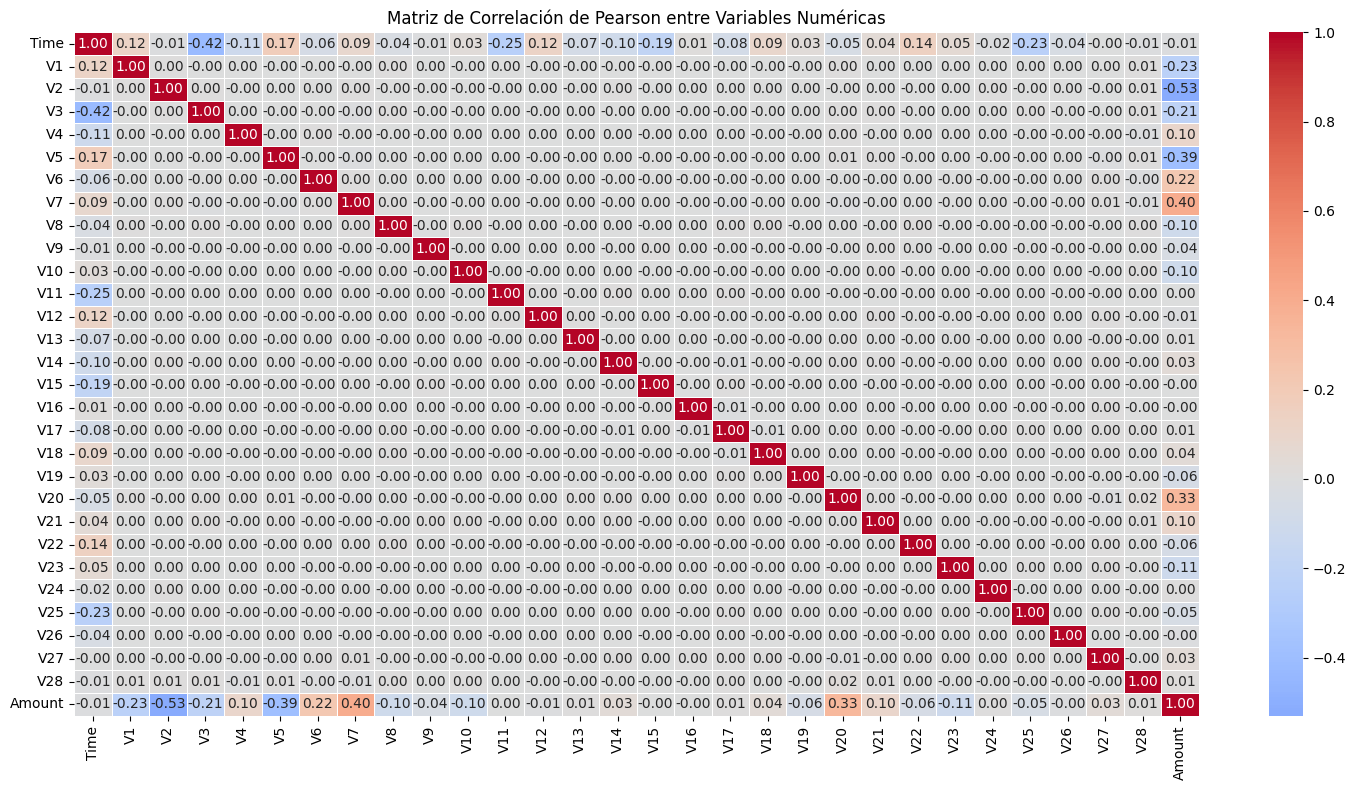

In [61]:
# Asegúrate de que num_cols sea una lista de nombres de columnas numéricas
num_cols = eda_df.select_dtypes(include='number').columns

# Calcular la matriz de correlación
correlacion_pearson = eda_df[num_cols].corr(method='pearson')

plt.figure(figsize=(15, 8))
sns.heatmap(correlacion_pearson, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Pearson entre Variables Numéricas')
plt.tight_layout()
plt.show()


# CORRELACIÓN SPEARMAN 

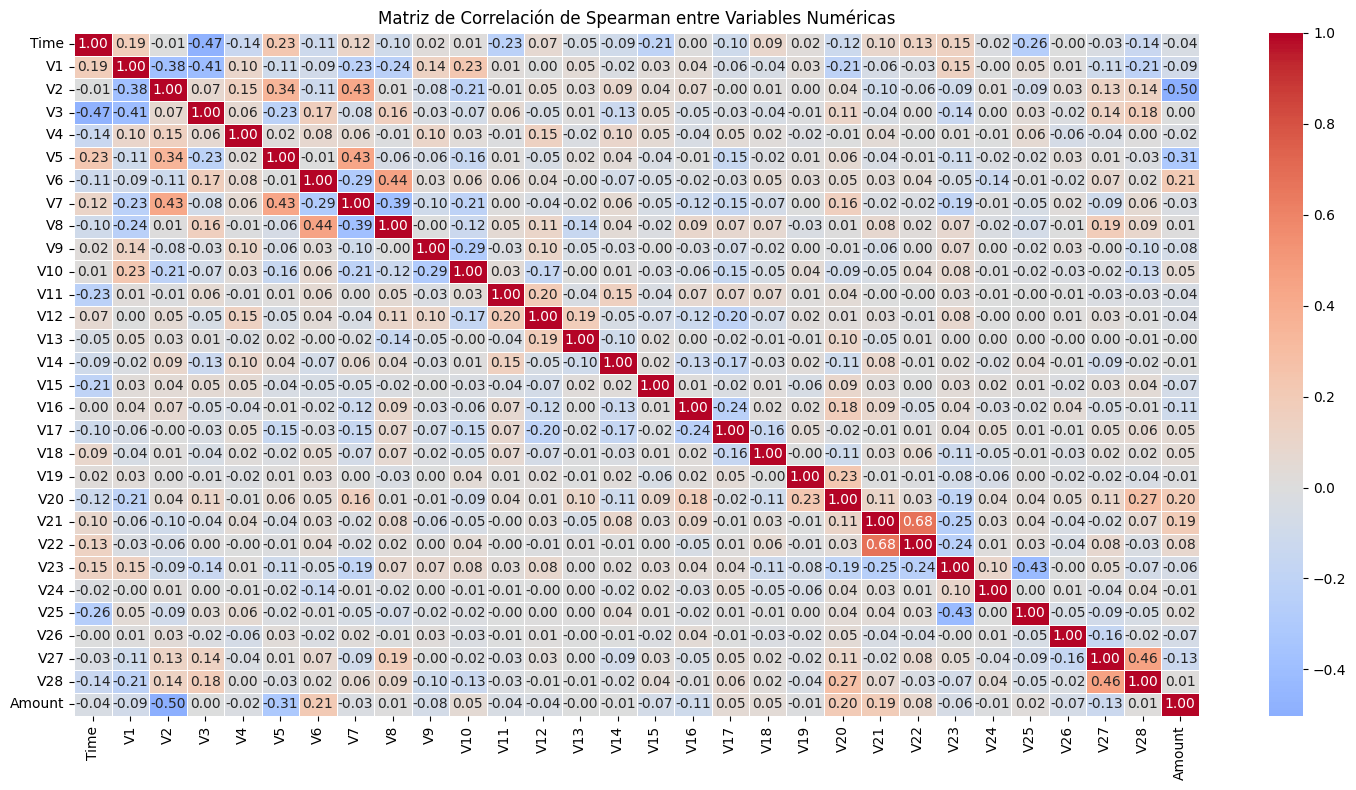

In [62]:
# Asegúrate de que num_cols sea una lista de nombres de columnas numéricas
num_cols = eda_df.select_dtypes(include='number').columns

# Calcular la matriz de correlación de Spearman
correlacion_spearman = eda_df[num_cols].corr(method='spearman')

plt.figure(figsize=(15, 8))
sns.heatmap(correlacion_spearman, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Spearman entre Variables Numéricas')
plt.tight_layout()
plt.show()
